<a href="https://colab.research.google.com/github/bhargavAB11/ML-projects/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 7.9 MB/s 
     |████████████████████████████████| 47.6 MB 1.9 MB/s 
     |████████████████████████████████| 145 kB 77.0 MB/s 
     |████████████████████████████████| 619 kB 80.0 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

Read in Image, Grayscale and Blur

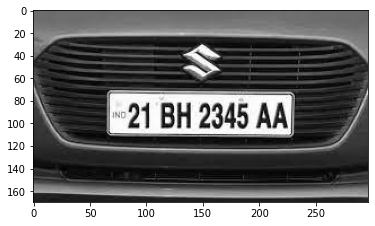

In [41]:
img = cv2.imread('/content/download.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Apply filter and find edges for localization

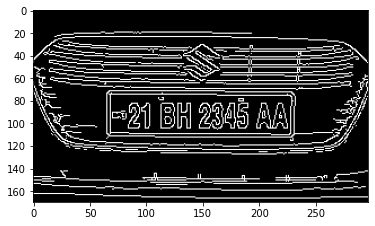

In [42]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Find Contours and Apply Mask

In [43]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [44]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [45]:
location

array([[[ 68,  75]],

       [[227,  75]],

       [[228, 108]],

       [[ 69, 108]]], dtype=int32)

In [46]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

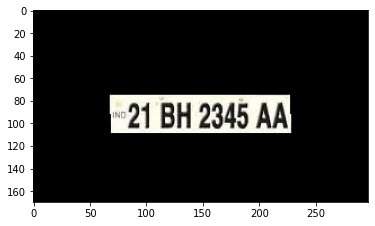

In [47]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [48]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

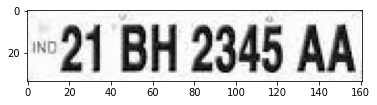

In [49]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

 Use Easy OCR To Read Text

In [50]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[11, 1], [161, 1], [161, 34], [11, 34]],
  '21 BH 2345 AA',
  0.6936109971048839)]

Render Result

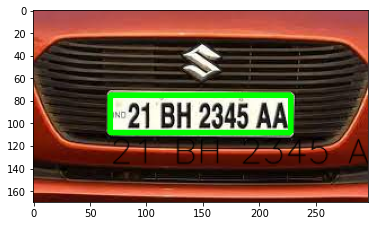

In [51]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,0,0), thickness=1, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))